## 为什么我们需要逻辑回归
线性回归对数据要求严格，比如标签必须满足正态分布，特征之间的多重共线性需要消除等。

计算分类概率->朴素Bayes等，人脸识别等深度学习领域->LR无出场

线性数据上表现优异，非线性数据还不如瞎猜。

优点
- 逻辑回归对线性关系的拟合效果好到丧心病狂。特征与标签之间的线性关系极强的数据，比如金融领域中的信用卡欺诈、评分卡制作等，在金融领域地位不可动摇。GDBT比逻辑回归效果好
- 计算快
- 返回类概率，可以将返回结果当成连续性数据来利用
- 抗噪声强，

缺点
- 异或问题

sklearn中的逻辑回归的相关类
sklearn.linear_model.LogisticRegression(peanlty='l2'，dual)
peanlty:正则化

In [7]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import logistic_regression_path # 正则化
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
# 评估指标
from sklearn.metrics import confusion_matrix  # 混淆矩阵
from sklearn.metrics import log_loss # 对数损失，逻辑损失/交叉熵损失
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 正则化的重要参数penalty&C
tupian
j>=1,第一个参数不参加正则化？
L1正则化和L2正则化都可以控制过拟合，但效果不同。当正则化强度逐渐增大(C逐渐变小)，参数的取值逐渐变小，**但L1会将参数压缩为0，L2会让参数尽量小，不会取到0**->L1正则化和L2正则化的优缺点，以及为什么L1会大部分都为0。
由于L1正则化的性质，逻辑回归的特征工程常常采用L1正则化和Eembbed嵌入法来进行特征工程

In [8]:
data = load_breast_cancer()

In [10]:
X = data.data
y = data.target

In [11]:
X.shape  # 30个特征

(569, 30)

In [12]:
lr_l1 = LR(penalty='l1', solver='liblinear',max_iter=1000)
lr_l2 = LR(penalty='l2', solver='liblinear',max_iter=1000)

In [13]:
# 重要参数coef_
lr_l1 = lr_l1.fit(X,y)
lr_l1.coef_

array([[ 4.53610092,  0.10050145, -0.25261248, -0.01657209,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.41314054,  0.        , -0.09648834,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.35742935, -0.075708  , -0.01508916,  0.        ,
         0.        , -3.52635947,  0.        ,  0.        ,  0.        ]])

In [14]:
(lr_l1.coef_ !=0).sum()  # 将30特征降低到10个特征

10

In [16]:
lr_l2 = lr_l2.fit(X,y)
lr_l2.coef_
(lr_l2.coef_ !=0).sum()

30

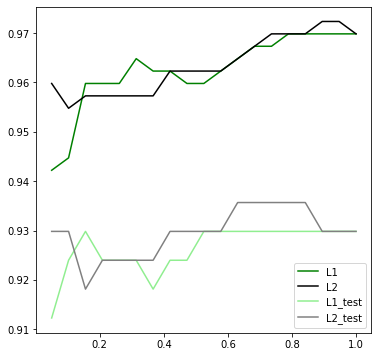

In [24]:
# 对l1和l2正则化的学习曲线和结果对比
l1 = []
l2 = []
l1_test = []
l2_test = []

# 划分训练集和测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty='l1',solver='liblinear',C=i,max_iter=1000)
    lrl2 = LR(penalty='l2',solver='liblinear',C=i,max_iter=1000) 
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain), Ytrain)) # 训练集上的表现
    l1_test.append(accuracy_score(lrl1.predict(Xtest),Ytest))  # 测试集上的表现
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2_test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l1,l2,l1_test,l2_test]
color = ['green','black','lightgreen','grey']
label = ['L1','L2','L1_test','L2_test']

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) # 图例位于右下角
plt.show()

### 逻辑回归的特征工程
- 业务选择
- PCA和SVD一般不使用，将特征的可解释性减弱。
- 统计方法可以使用，但是不必要：这是因为对于线性回归来说，多重共线性影响比较大，使用**方差过滤和方差膨胀因子VIF**来消除共线性；但对于逻辑回来来说没有必要，不使用最小二乘法，所以共线性对LR没有太大影响。


In [25]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
# 目的在于选出让模型表现好的特征

In [34]:
LR_ = LR(solver='liblinear',C=0.8,max_iter=1000)
cross_val_score(LR_,X,y,cv=10).mean()

0.9508998790078644

In [35]:
X_embedded = SelectFromModel(LR_,norm_order=2).fit_transform(X,y) # threshold默认None，即L1正则化后参数不为0的特征;norm_oder范式
X_embedded.shape

(569, 9)

In [36]:
cross_val_score(LR_,X_embedded,y,cv=10).mean()

0.9368323826808401

0.0 30
0.005438398876070178 28
0.010876797752140356 27
0.016315196628210533 26
0.02175359550428071 26
0.02719199438035089 23
0.032630393256421066 23
0.038068792132491244 21
0.04350719100856142 21
0.0489455898846316 21
0.05438398876070178 21
0.05982238763677196 20
0.06526078651284213 19
0.07069918538891232 19
0.07613758426498249 19
0.08157598314105267 19
0.08701438201712285 19
0.09245278089319302 19
0.0978911797692632 19
0.10332957864533338 18


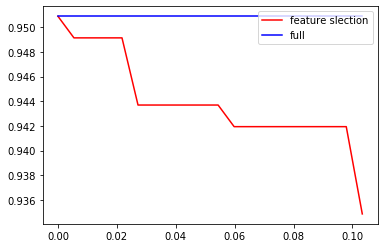

In [41]:
# threshold的学习曲线
fullx = []
fsx = []

threshold = np.linspace(0,abs(LR_.fit(X,y).coef_).max(),20)
threshold = np.linspace(0,0.10332957864533338,20)



k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    print(threshold[k],X_embedded.shape[1])
    k += 1
plt.figure()
plt.plot(threshold,fsx,color='red',label='feature slection')
plt.plot(threshold,fullx,color='blue',label='full')
plt.legend(loc=1)
plt.show()

# 25个特征会有比较好的结果，对于本身为30个影响实在不大，考虑调整模型本身，通过C

0.8821925503413708 0.01
0.9244879439979258 0.51
0.9368323826808401 1.01
0.9438510068274134 1.51
0.9473597787572379 2.01
0.9473597787572379 2.01
0.9492059891107077 3.01
0.95096037507562 3.51
0.9545004753262466 4.01
0.9545004753262466 4.01
0.9545004753262466 4.01
0.9545004753262466 4.01
0.9545004753262466 4.01
0.9545004753262466 4.01
0.9563164376458386 7.01
0.9563164376458386 7.01
0.9563164376458386 7.01
0.9563164376458386 7.01
0.9563164376458386 7.01
0.9563164376458386 7.01


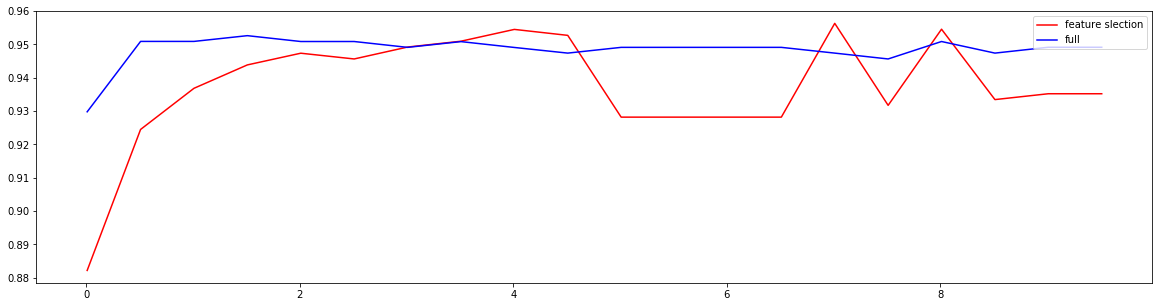

In [48]:
# 调整c
fullx = []
fsx = []

C= np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
   
    print(max(fsx),C[fsx.index(max(fsx))])

plt.figure(figsize=(20,5))
plt.plot(C,fsx,color='red',label='feature slection')
plt.plot(C,fullx,color='blue',label='full')
plt.legend(loc=1)
plt.show()

0.928182525278714 6.05
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.9563164376458386 6.055
0.

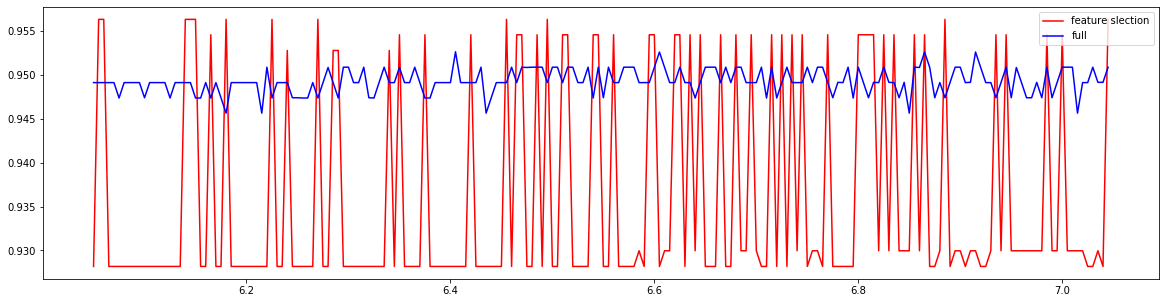

In [50]:
# c
fullx = []
fsx = []

C= np.arange(6.05,7.05,0.005)

for i in C:
    LR_ = LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
   
    print(max(fsx),C[fsx.index(max(fsx))])

plt.figure(figsize=(20,5))
plt.plot(C,fsx,color='red',label='feature slection')
plt.plot(C,fullx,color='blue',label='full')
plt.legend(loc=1)
plt.show()

In [ ]:
# 包装法，实际应用中可能会有需要5-8个变量的需求->包装法

### 梯度下降的参数max_iter
gradient:损失函数的值**增加最快的方向**，所以应该反梯度方向。
注意步长的调整：max_iter越大，步长越小

### 多元回归：参数solver&multi_class
OvR(One over Rest), MvM(多对多)，逻辑回归实际上是将多类别转换为二分类来解决
multi_class:'ovr'->'auto'
            'multinormial':表示处理多分类问题，solver为liblinear时不可用
solver:'liblinear'
        
        
softmax
### 样本不平衡与参数class_weight
样本不平衡是在一组数据中，标签的一类天生占有很大的比例，或者误分类的代价很高。

使用class_weight样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕捉少数类的方向建模。

参数难用，其余主流方法：采样法，通过重复样本的方式平衡标签，upsampling（增加少数类）如SMOTE；downsampling（减少多数类的样本）。
对逻辑回归来说upsampling是最好的方法。